# TITLE: Impacts of Various Features on Starting Salary

CREATED BY: Jake Duffy (jtd164)

## General Overview

METHODOLOGY: since I could't find any datasets containing all of the data that I wanted, I simulated the data myself. However, instead of generating data in a completely random manner, I wanted to use a more in-depth approach. What I did was this: I found average salary data for each of the majors I was interested in (Computer Science, Engineering, Mathematics/Statistics, Physical Sciences, and Biology), and I created a range of possible starting salary values based on these averages. More specifically, each major's starting salary range has a lower bound of the major's average salary divided by 2, and an upper bound of the major's average salary multiplied by 1.5. Each data entry's starting salary value is initially set to a random integer from its corresponding salary range. In addition to this, I searched the internet for research papers showing how each of the other features (degree type, school type, school ranking, internship experience, and location) independently affects starting salary in the real world. To account for the influence that these features have on the real-world data, I went ahead and determined a "multiplier" value for each of these features independent of one another. To put everything together, I took the initial starting salary value (which we generated from the major-based salary range) and multiplied it by all of these multiplier values (I did this process for every data entry).


For example, let's say we're generating a starting salary for someone with a masters in Computer Science from a public institution ranked 200th out of 1500 schools, who's had previous internship experience and lives in the Southeast Rural region. Since the average salary for a computer science major is 91411, the initial salary value is chosen at random from a range starting at 45705 (91114 // 2) up to 137116 (91114 x 1.5). Say we get an initial starting salary value of 75000. By looking at the overview below, we can find that the degree type, school ranking, school type (public vs private), internship experience, and location multipliers would be 1.276, 1.1, 1.0, 1.1, 0.883 respectively. Thus, the final starting salary value we arrive at is 75000 x 1.276 x 1.1 x 1.0 x 1.1 x 0.883 = 102248.


Features examined: major [1], degree type [1], private vs public school [2], school ranking [3], GPA [4], double major [5], internship experience [6], location [7]


REFERENCES FOR HOW I APPROACHED SIMULATING THE DATA:

[1] Class of 2023 Mean Starting Salary by Major & Degree Type: https://www.naceweb.org/job-market/graduate-outcomes/first-destination/class-of-2023/interactive-dashboard

MEAN STARTING SALARIES BY MAJOR (with bachelors degree):
* Computer Science: 91,411
    - -> salary range = [45705, 137116]
* Engineering: 80,085
    - -> salary range = [40042, 120127]
* Mathematics / Statistics: 79,859
    - -> salary range = [39929, 119788]
* Physical Sciences: 57,909
    - -> salary range = [28954, 86863]
* Biology: 47,839
    - -> salary range = [23919, 71758]
    
As a side note, the reason why I capped the upper bounds to be average salary * 1.5 instead of average salary * 2 is simply because of the fact that most of the multiplier values are positive multipliers (i.e. greater than 1), so higher starting salary values are much more sensitive to these multipliers, and thus, much more likely to become outliers (which would skew the average adjusted salaries).

DEGREE TYPE MULTIPLIER:
* bachelors degree overall mean salary: 63721 (using this as the baseline since the mean salary values are based on bachelors degree programs)
    - -> multiplier for bachelor's degree = 63721 / 63721 = 1.000
* masters degree overall mean salary: 81308
    - -> multiplier for masters degree = 81308/63721 = 1.276
* doctorate degree overall mean salary: 99256
    - -> multiplier for doctorate degree = 99256/63721 = 1.557



[2] Impact of Graduating From a Private vs Public Institution: https://www.uakron.edu/economics/academics/senior-projects/2020/Parthemer-I-SeniorProject2020.pdf 

PRIVATE VS PUBLIC SCHOOL SALARY MULTIPLIER:
* Main takeaway from the data: the private school salaries were roughly 3.77 percent higher than public school salaries on average
    - -> multiplier for private school attendance: 1.0377
    - -> multiplier for public school attendance: 1.0
  
    

[3] Impact of School Ranking on Early Career Pay: https://www.payscale.com/college-salary-report/bachelors

SCHOOL RANKING MULTIPLIER
* Couldn't find an exact statistic for this value, but a rough observation I made from ordering the schools from top to bottom: the early career pay for colleges in the interquartile range (lower quartile up to upper quartile) ranged from 49,800 to 83,000, the upper quartile (excluding top 5%) ranged from 58,100 to 91,000, and the lower quartile (excluding bottom 5%) ranged from 44,600 to 67,100. Additionally, just about all of the universities in the top 5% had average salaries higher than the IQR (73,300 to 115,000 is the specific range), and inversely, the bottom 5% all had salaries lower than or within a few thousand USD of the lower bound for the IQR (39,500 to 57,700 is the specific range).
    * The average starting salary across the WHOLE DATASET is (115000 + 39500) / 2 = 77250
    * The average starting salary across the IQR is (83000 + 49800) / 2 + 66400
        - this value is roughly 15% lower than the average for the entire dataset, which implies outliers on the upper end of the spectrum are more impactful than outliers on the lower end
        - thus, the average of the IQR range (calculated above) serves as a better representation of a "typical" salary value than the overall average (77250), so we will use it in the calculations below
    * The average starting salary in the UPPER QUARTILE (cxcluding top 5%) is (58100 + 91000) / 2 = 74550
        - -> school ranking in upper quartile multiplier is 74550 / 66400 = 1.1 (rounded to 1 decimal)
    * The average starting salary in the TOP 5% is (73300 + 115000) / 2 = 94150
        - -> school ranking in top 5% multiplier is 94150 / 66400 = 1.4 (rounded to 1 decimal)
    * The average starting salary in the LOWER QUARTILE (excluding bottom 5%) is (44600 + 67100) / 2 = 55850
        - -> school ranking in lower quartile multiplier is 55850 / 66400 = 0.8 (rounded to 1 decimal)
    * The average starting salary in the BOTTOM 5% is (39500 + 57700) / 2 = 48600
        - -> school ranking in bottom 5% multiplier is 48600 / 66400 = 0.7 (rounded to 1 decimal)
* School ranking values will be generated from 1 (best school) to 1500 (worst school)
    - TOP 5% MULTIPLIER (x1.4) RANGE: [1, 74]
    - UPPER QUARTILE (x1.3) MULTIPLIER RANGE: [75, 375]
    - LOWER QUARTILE (x0.8) MULTIPLIER RANGE: [1125, 1425]
    - BOTTOM 5% MULTIPLIER (x0.7) RANGE: [1426, 1500]
    - ELSE: multiplier will be 1.0 for school ranking value not in any of the above ranges
    


[4] Impact of GPA on Starting Salary: http://ascpro0.ascweb.org/archives/cd/2017/paper/CEUE151002017.pdf

* I was originally planning on having a GPA multiplier for each entry in the database, but after reading through a few papers, it seems that GPA has more of an impact on salary growth rather than starting salary (see Table 1 in the results section of the above paper). Thus, I decided to exclude GPA values (and in turn, a GPA multiplier) from the dataset entirely.



[5] Impact of a Double Major on Starting Salary: https://www.nber.org/papers/w32095

* Similarly to the GPA multiplier, I decided to exclude a double major multiplier since I couldn't find data correlating a double major with a higher/lower starting salary. The only information I found (for example, in the paper listed above) was a correlation between the possession of a double major and overall career earning stability, which can't be represented in either of the models I've created.



[6] Impact of Internship Experience on Starting Salary: https://library.ndsu.edu/ir/bitstream/handle/10365/29006/Domholt_ndsu_0157N_12170.pdf?sequence=1&isAllowed=y 

INTERNSHIP EXPERIENCE MULTIPLIER
* The paper above found that the average starting salary for someone with a paid internship was 50851, while the average starting salary for someone with no internship experience was 46126 (see Table 4 on page 28). I will not be including a distinction between paid and unpaid internships, as there were less than 100 samples for unpaid internships, and I believe there may be strong hidden variables affecting the pay of college graduates who participated in unpaid internships (e.g. companies who offer unpaid internships may have a tendency to underpay their full-time employees).
    - -> internship experience multiplier is (50851 + 46126) / 2 = 1.1 (rounded to 1 decimal place)
    - -> no internship experience multiplier is 1.0 (baseline)
    


[7] Impact of Location on Salary: https://www.shrm.org/topics-tools/news/benefits-compensation/beyond-msas-determining-how-u-s-pay-varies-location 

LOCATION MULTIPLIER
* The above paper divides the US into the following pay ranges (note that I concatenated some of the specific regions for the sake of simplicity - e.g. instead of having 4 different subsections of California Bay Area, I combined them into 1 region and placed it into the pay zone where it occurred most often, biasing the higher pay zone):
    1.) Pay Zone 1 (multiplier: 1.266)
        - California Bay Area
    2.) Pay Zone 2 (multiplier: 1.078)
        - NYC Greater Area
        - Northwest Urban
    3.) Pay Zone 3 (multiplier: 1.022)
        - Non-Contiguous
        - Northeast Urban
        - Southwest Urban
        - Southeast Urban
    4.) Pay Zone 4 (multiplier: 0.976)
        - Midwest Urban
    5.) Pay Zone 5 (multiplier: 0.922)
        - Northwest Rural
        - Midwest Rural
    6.) Pay Zone 6 (multiplier: 0.883)
        - Northeast Rural
        - Southwest Rural
        - Southeast Rural
        - Plains

List of regions for quick reference: [California Bay Area, NYC Greater Area, Northeast Urban, Northeast Rural, Northwest Urban, Northwest Rural, Southeast Urban, Southeast Rural, Southwest Urban, Southwest Rural, Midwest Urban, Midwest Rural, Plains, Non-Contiguous]
        

# STEP 1: Simulate & Store Data

## 1a.) Simulating the Data
The code below simulates data entries for each of the different major types in accordance with the excerpt above.

In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of entries per major
entries_per_major = 20000

# Map majors to their average salary values
majors = {
    "Computer Science": 91411,
    "Engineering": 80085,
    "Mathematics/Statistics": 79859,
    "Physical Sciences": 57909,
    "Biology": 47839
}

# Compute salary ranges for each major
salary_ranges = {
    major: (avg_salary // 2, int(avg_salary * 1.5))
    for major, avg_salary in majors.items()
}

# Degree types and corresponding multiplier and proability values
degree_types = {
    "bachelors": 1.000,
    "masters": 1.276,
    "doctorate": 1.557
}
degree_type_list = list(degree_types.keys())
degree_type_probs = [0.7, 0.2, 0.1]  # accounts for the fact that higher degree types occur less often

# Function that takes in a school ranking value and outputs the corresponding multiplier value
def school_ranking_multiplier(rank: int) -> float:
    if 1 <= rank <= 74:
        return 1.4
    elif 75 <= rank <= 375:
        return 1.1
    elif 1125 <= rank <= 1425:
        return 0.8
    elif 1426 <= rank <= 1500:
        return 0.7
    else:
        return 1.0

# School type multiplier and probability values
school_types = ["public", "private"]
school_type_probs = [0.6, 0.4]

school_type_multiplier = {
    "public": 1.0,
    "private": 1.0377
}

# Internship experience multiplier values (50/50 chance for internship)
def internship_multiplier(has_internship: bool) -> float:
    return 1.1 if has_internship else 1.0

# Location multiplier and probability values (uniform probability)
location_list = ["California Bay Area", "NYC Greater Area", "Northeast Urban", "Northeast Rural", 
                 "Northwest Urban", "Northwest Rural", "Southeast Urban", "Southeast Rural", 
                 "Southwest Urban", "Southwest Rural", "Midwest Urban", "Midwest Rural", 
                 "Plains", "Non-Contiguous"]

location_probs = [1/len(location_list)] * len(location_list)

location_multiplier = {
    "California Bay Area": 1.266,
    "NYC Greater Area": 1.078,
    "Northeast Urban": 1.022,
    "Northeast Rural": 0.883,
    "Northwest Urban": 1.078,
    "Northwest Rural": 0.922,
    "Southeast Urban": 1.022,
    "Southeast Rural": 0.883,
    "Southwest Urban": 1.022,
    "Southwest Rural": 0.883,
    "Midwest Urban": 0.976,
    "Midwest Rural": 0.922,
    "Plains": 0.883,
    "Non-Contiguous": 1.022
}

# Prepare lists to store generated data
data = {
    "major": [],
    "initial_starting_salary": [],
    "adjusted_starting_salary": [],
    "degree_type": [],
    "school_ranking": [],
    "school_type": [],
    "internship_experience": [],
    "location": []
}

# Generate data
for major, avg_salary in majors.items():
    lower_bound, upper_bound = salary_ranges[major]
    
    # initial_starting_salary
    initial_salaries = np.random.randint(lower_bound, upper_bound+1, size=entries_per_major)
    
    # degree_type
    deg_types = np.random.choice(degree_type_list, p=degree_type_probs, size=entries_per_major)
    
    # school_ranking
    rankings = np.random.randint(1, 1501, size=entries_per_major)
    
    # school_type
    sch_types = np.random.choice(school_types, p=school_type_probs, size=entries_per_major)
    
    # internship_experience
    internships = np.random.choice([True, False], p=[0.5, 0.5], size=entries_per_major)
    
    # location
    locs = np.random.choice(location_list, p=location_probs, size=entries_per_major)
    
    # Compute adjusted salary
    adjusted_salaries = []
    for i in range(entries_per_major):
        base = initial_salaries[i]
        
        # multipliers
        deg_mult = degree_types[deg_types[i]]
        rank_mult = school_ranking_multiplier(rankings[i])
        sch_mult = school_type_multiplier[sch_types[i]]
        intern_mult = internship_multiplier(internships[i])
        loc_mult = location_multiplier[locs[i]]
        
        final_salary = base * deg_mult * rank_mult * sch_mult * intern_mult * loc_mult
        final_salary = int(round(final_salary))
        adjusted_salaries.append(final_salary)
    
    # Append to data dictionary
    data["major"].extend([major]*entries_per_major)
    data["initial_starting_salary"].extend(initial_salaries)
    data["adjusted_starting_salary"].extend(adjusted_salaries)
    data["degree_type"].extend(deg_types)
    data["school_ranking"].extend(rankings)
    data["school_type"].extend(sch_types)
    data["internship_experience"].extend(internships)
    data["location"].extend(locs)

# Create dataframe
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("simulated_starting_salary_data.csv", index=False)

# Print overview of the dataframe
print("DataFrame Overview:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

DataFrame Overview:
              major  initial_starting_salary  adjusted_starting_salary  \
0  Computer Science                    61500                     60024   
1  Computer Science                    46565                     66797   
2  Computer Science                   122525                    160965   
3  Computer Science                   100591                    117348   
4  Computer Science                    51970                     66158   

  degree_type  school_ranking school_type  internship_experience  \
0   bachelors             524      public                  False   
1     masters             233      public                  False   
2   bachelors             605     private                  False   
3   bachelors             107     private                  False   
4   doctorate            1217      public                  False   

              location  
0        Midwest Urban  
1      Southwest Urban  
2  California Bay Area  
3       Non-Contiguous  
4

## 1b.) Storing the Data
The code below takes the data that was placed into the CSV file and feeds it into a SQLlite table for later use. Some simple queries are made to give more information about the dataset.

In [2]:
from sqlalchemy import create_engine, text

# Read in the CSV file and create SQLlite table called Data
df = pd.read_csv("simulated_starting_salary_data.csv")
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df.to_sql('Data', con=engine, if_exists='replace', index=False)


100000

### Query 1
Finding overall average starting salary before and after multipliers were applied...

In [3]:
query = """
SELECT 
    AVG(initial_starting_salary) AS avg_overall_initial_salary, 
    AVG(adjusted_starting_salary) AS avg_overall_adjusted_salary
FROM 
    Data;
"""

avg_salaries = pd.read_sql(query, con=engine)

print(avg_salaries)

   avg_overall_initial_salary  avg_overall_adjusted_salary
0                 71320.19513                   82410.5508


### Query 2
Finding average salary by major before and after multipliers are applied...

In [4]:
query = """
SELECT 
    major, 
    COUNT(*) as total_entries, 
    AVG(initial_starting_salary) AS avg_initial_salary, 
    AVG(adjusted_starting_salary) AS avg_adjusted_salary
FROM 
    Data
GROUP BY 
    major;
"""

avg_salaries_by_major = pd.read_sql(query, con=engine)

print(avg_salaries_by_major)

                    major  total_entries  avg_initial_salary  \
0                 Biology          20000         47844.55260   
1        Computer Science          20000         91120.93885   
2             Engineering          20000         79892.84810   
3  Mathematics/Statistics          20000         79908.91915   
4       Physical Sciences          20000         57833.71695   

   avg_adjusted_salary  
0          55264.90695  
1         105278.04885  
2          92526.05850  
3          92267.91905  
4          66715.82065  


### Query 3
Finding average salary by degree type...

In [5]:
query = """
SELECT 
    degree_type, 
    AVG(adjusted_starting_salary) AS avg_adjusted_salary
FROM 
    Data
GROUP BY 
    degree_type
ORDER BY
    avg_adjusted_salary;
"""

avg_salaries_by_degree_type = pd.read_sql(query, con=engine)

print(avg_salaries_by_degree_type)

  degree_type  avg_adjusted_salary
0   bachelors         74043.930820
1     masters         94413.094753
2   doctorate        116404.976108


### Query 4
Finding min and max initial_starting_salary and adjusted_starting_salary for each major...

In [6]:
query = """
SELECT 
    major, 
    MIN(initial_starting_salary) as min_initial_salary, 
    MAX(initial_starting_salary) as max_initial_salary, 
    MIN(adjusted_starting_salary) as min_adjusted_salary, 
    MAX(adjusted_starting_salary) as max_adjusted_salary
FROM 
    Data
GROUP BY 
    major
ORDER BY
    min_initial_salary;
"""

salary_stats = pd.read_sql(query, con=engine)

print(salary_stats)

                    major  min_initial_salary  max_initial_salary  \
0                 Biology               23919               71756   
1       Physical Sciences               28955               86863   
2  Mathematics/Statistics               39929              119780   
3             Engineering               40042              120122   
4        Computer Science               45707              137116   

   min_adjusted_salary  max_adjusted_salary  
0                15155               186825  
1                18198               232359  
2                24996               351670  
3                24926               316688  
4                28505               393573  


### Query 5
Number of adjusted salaries for each major whose values are above/below the upper/lower bound set for the initial_starting_salary ranges...

In [7]:
query = text("""
SELECT 
    major,
    SUM(
        CASE 
            WHEN major = 'Computer Science' AND adjusted_starting_salary > 137116 THEN 1
            WHEN major = 'Engineering' AND adjusted_starting_salary > 120127 THEN 1
            WHEN major = 'Mathematics/Statistics' AND adjusted_starting_salary > 119788 THEN 1
            WHEN major = 'Physical Sciences' AND adjusted_starting_salary > 86863 THEN 1
            WHEN major = 'Biology' AND adjusted_starting_salary > 71758 THEN 1
            ELSE 0
        END
    ) AS count_above_upper_bound,
    SUM(
        CASE 
            WHEN major = 'Computer Science' AND adjusted_starting_salary < 45705 THEN 1
            WHEN major = 'Engineering' AND adjusted_starting_salary < 40042 THEN 1
            WHEN major = 'Mathematics/Statistics' AND adjusted_starting_salary < 39929 THEN 1
            WHEN major = 'Physical Sciences' AND adjusted_starting_salary < 28954 THEN 1
            WHEN major = 'Biology' AND adjusted_starting_salary < 23919 THEN 1
            ELSE 0
        END
    ) AS count_below_lower_bound
FROM Data
GROUP BY major;
""")

salary_counts = pd.read_sql(query, con=engine)

print(salary_counts)

                    major  count_above_upper_bound  count_below_lower_bound
0                 Biology                     4042                      524
1        Computer Science                     4012                      581
2             Engineering                     4032                      529
3  Mathematics/Statistics                     3941                      522
4       Physical Sciences                     3914                      506


# STEP 2: Train & Evaluate Linear Regression Model

In [8]:
from IPython.display import display, HTML

# Increase height of scrollable output area so we can view the results
display(HTML("<style>.output_scroll { height:auto !important; max-height:800px; }</style>"))

Overall Mean Squared Error (MSE): 69719993.43388921
Overall Root Mean Squared Error (RMSE): 8349.849904871897
Overall R2 Score: 0.936078732742795


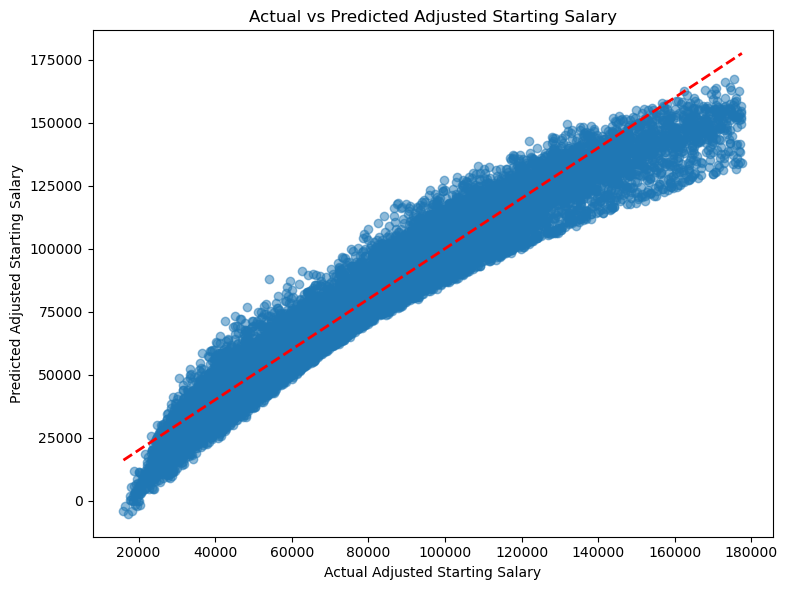

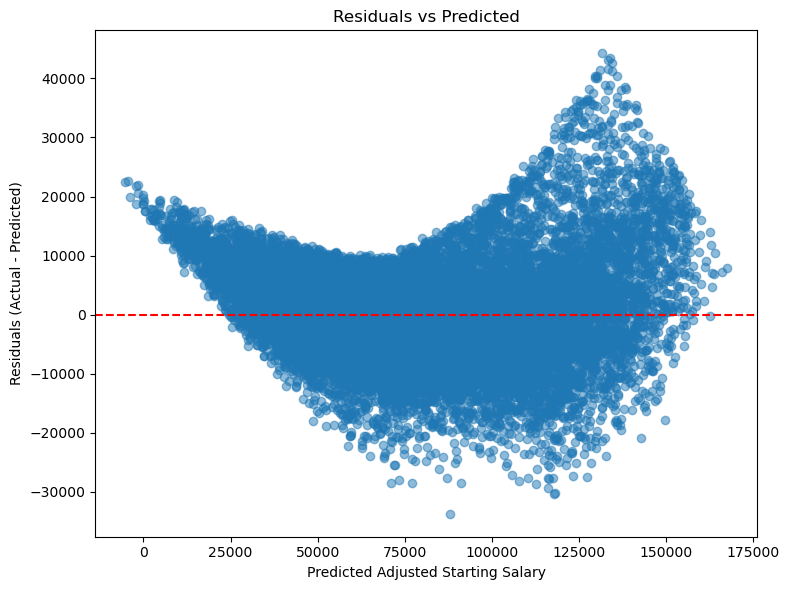


Metrics per Major:
                    major           MSE         RMSE        R2
0  Mathematics/Statistics  7.413234e+07  8610.014038  0.926781
1       Physical Sciences  5.324111e+07  7296.650487  0.916171
2                 Biology  5.952270e+07  7715.095459  0.869299
3             Engineering  7.642865e+07  8742.348079  0.926075
4        Computer Science  8.617110e+07  9282.839009  0.918705


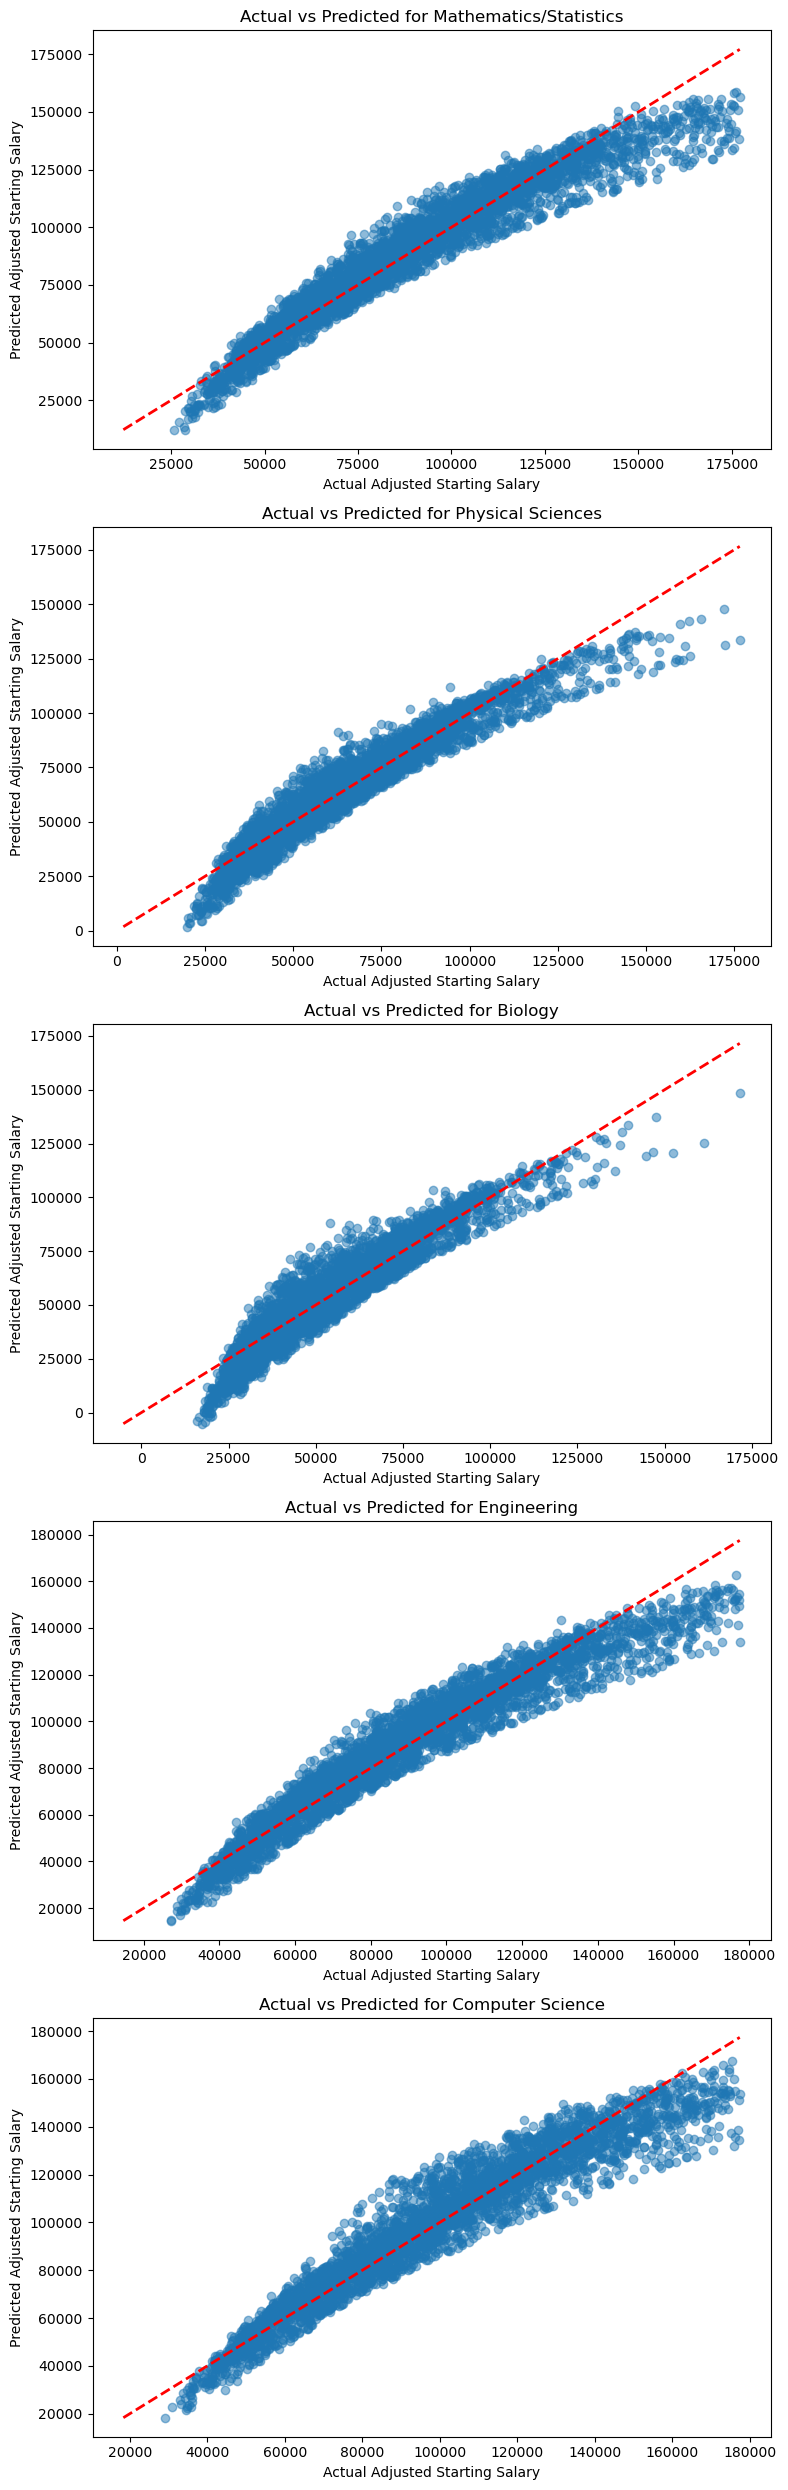

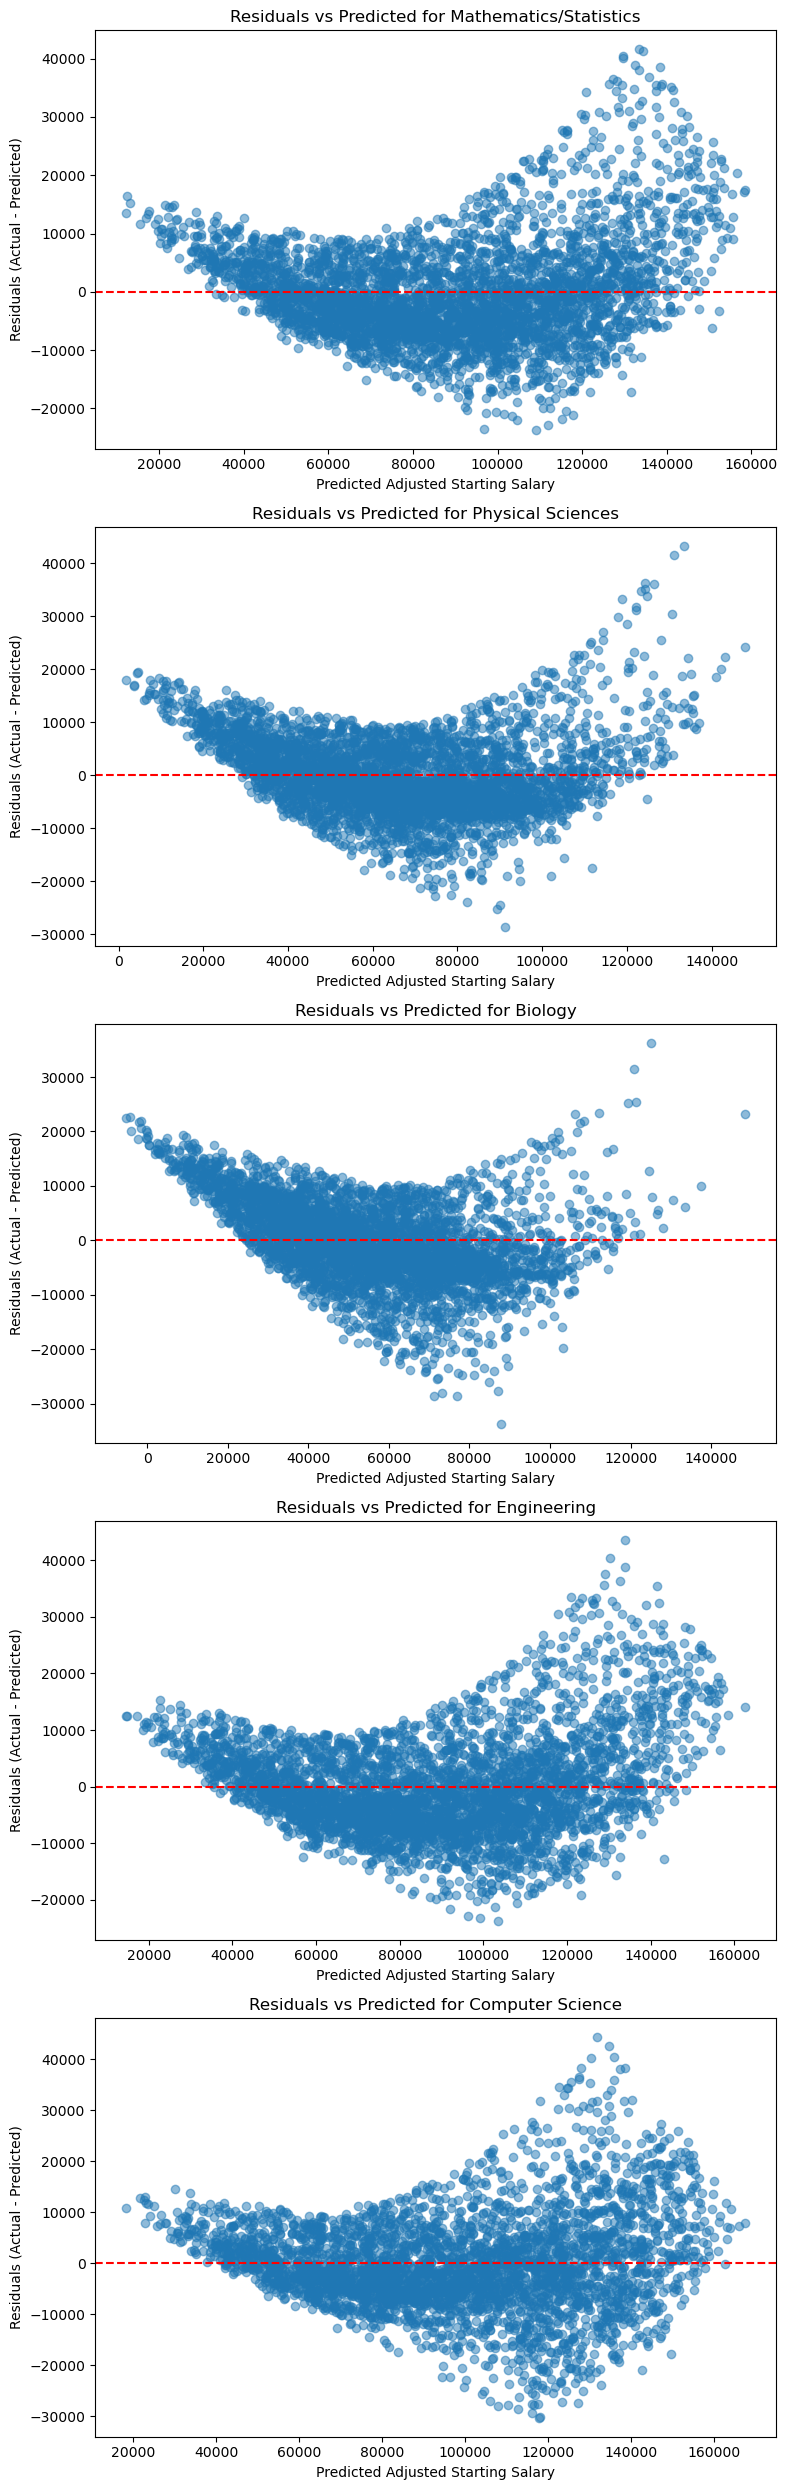

In [9]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# STEP 1: read data from database
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df = pd.read_sql('SELECT * FROM Data', con=engine)



# STEP 2: preprocess data (cap outliers and one-hot encode categorical variables)

# Cap outliers using IQR
Q1 = df['adjusted_starting_salary'].quantile(0.25)
Q3 = df['adjusted_starting_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['adjusted_starting_salary'] >= lower_bound) & (df['adjusted_starting_salary'] <= upper_bound)]

# Target variable
y = df['adjusted_starting_salary']

# Features (all columns except adjusted_starting_salary)
X = df.drop('adjusted_starting_salary', axis=1)

# Convert internship_experience (True/False) to integer (1/0)
X['internship_experience'] = X['internship_experience'].astype(int)

# Keep track of majors (before one-hot encoding) for later evaluation
majors = X['major'].copy()

# Convert categorical variables into one-hot encoded variables
# X = pd.get_dummies(X, columns=['major', 'degree_type', 'school_type', 'location'], drop_first=True)
X = pd.get_dummies(X, columns=['major', 'degree_type', 'school_type', 'location'], drop_first=False)
X = X.drop(columns=['major_Biology'])  # setting "Biology" as the baseline for major weighting
X = X.drop(columns=['degree_type_bachelors'])  # setting "Bachelors" as the baseline for degree type weighting
X = X.drop(columns=['school_type_public'])  # setting "public" as the baseline for school type weighting
X = X.drop(columns=['location_Midwest Urban'])  # setting "Midwest Urban" as the baseline for location weighting

# Split into train and test sets
X_train, X_test, y_train, y_test, majors_train, majors_test = train_test_split(
    X, y, majors, test_size=0.2, random_state=42
)
# NOTE: added this in here to artificially increase the "major_Computer Science" coefficient value since - for
# whatever reason - the model was giving me a lower coefficient value for the computer science major multiplier
# compared to all the other majors
X_train['major_Computer Science'] *= 0.15
X_test['major_Computer Science'] *= 0.15



# STEP 3: train and evaluate the model overall

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model overall
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Overall Mean Squared Error (MSE):", mse)
print("Overall Root Mean Squared Error (RMSE):", rmse)
print("Overall R2 Score:", r2)

# Create a DataFrame with actual, predicted, and major
results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'major': majors_test
})



# STEP 4: visiualize overall results of the model

# Visualize predicted vs actual values on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # line of perfect fit
plt.xlabel('Actual Adjusted Starting Salary')
plt.ylabel('Predicted Adjusted Starting Salary')
plt.title('Actual vs Predicted Adjusted Starting Salary')
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Adjusted Starting Salary')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()



# STEP 5: find metrics and create graphs for each major 

# Compute metrics per major
majors_list = results['major'].unique()
metrics = []
for m in majors_list:
    subset = results[results['major'] == m]
    mse_m = mean_squared_error(subset['actual'], subset['predicted'])
    r2_m = r2_score(subset['actual'], subset['predicted'])
    rmse_m = np.sqrt(mse_m)
    metrics.append((m, mse_m, rmse_m, r2_m))

metrics_df = pd.DataFrame(metrics, columns=['major', 'MSE', 'RMSE', 'R2'])
print("\nMetrics per Major:")
print(metrics_df)

# Plot Actual vs Predicted for each major on separate subplots
num_majors = len(majors_list)
fig, axes = plt.subplots(nrows=num_majors, ncols=1, figsize=(8, 5 * num_majors))

if num_majors == 1:
    # If there's only one major, axes won't be a list
    axes = [axes]

for ax, m in zip(axes, majors_list):
    subset = results[results['major'] == m]
    ax.scatter(subset['actual'], subset['predicted'], alpha=0.5)
    # Plot a line of fit
    min_val = min(subset['actual'].min(), subset['predicted'].min())
    max_val = max(subset['actual'].max(), subset['predicted'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    ax.set_title(f"Actual vs Predicted for {m}")
    ax.set_xlabel("Actual Adjusted Starting Salary")
    ax.set_ylabel("Predicted Adjusted Starting Salary")

plt.tight_layout()
plt.show()

# Residual plots per major
fig, axes = plt.subplots(nrows=num_majors, ncols=1, figsize=(8, 5 * num_majors))

if num_majors == 1:
    axes = [axes]

for ax, m in zip(axes, majors_list):
    subset = results[results['major'] == m]
    residuals = subset['actual'] - subset['predicted']
    ax.scatter(subset['predicted'], residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f"Residuals vs Predicted for {m}")
    ax.set_xlabel("Predicted Adjusted Starting Salary")
    ax.set_ylabel("Residuals (Actual - Predicted)")

plt.tight_layout()
plt.show()


### Checking weights in the linear regression model...

In [10]:
# Comparing location coefficients
location_features = [col for col in X_train.columns if 'location_' in col]
location_coefficients = model.coef_[[X_train.columns.get_loc(f) for f in location_features]]
location_coef_df = pd.DataFrame({
    'Location Feature': location_features,
    'Coefficient': location_coefficients
}).sort_values(by='Coefficient', ascending=False)

print("LOCATION COEFFICIENTS...")
print(location_coef_df)
print()


# Comparing major coefficients
major_features = [col for col in X_train.columns if 'major_' in col]
major_coefficients = model.coef_[[X_train.columns.get_loc(f) for f in major_features]]

print("MAJOR COEFFICIENTS...")
print(pd.DataFrame({'Major Feature': major_features, 'Coefficient': major_coefficients}))
print()


# Finding the most impactful features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("FEATURES RANKED BY IMPACT...")
print(feature_importance.head(100))
print()


# Looking at categories in the training data frame (should exclude the categories that we want to use as baselines)
print("TRAINING COLUMNS...")
print(X_train.columns)
print()

LOCATION COEFFICIENTS...
                Location Feature   Coefficient
0   location_California Bay Area  21322.914885
2      location_NYC Greater Area   7995.643851
7       location_Northwest Urban   7843.939168
12      location_Southwest Urban   3681.081965
5       location_Northeast Urban   3625.759985
3        location_Non-Contiguous   3523.094649
10      location_Southeast Urban   3491.546958
6       location_Northwest Rural  -3914.150354
1         location_Midwest Rural  -4179.906805
11      location_Southwest Rural  -7191.908653
9       location_Southeast Rural  -7205.300804
4       location_Northeast Rural  -7383.128773
8                location_Plains  -7417.820246

MAJOR COEFFICIENTS...
                  Major Feature  Coefficient
0        major_Computer Science  1211.197151
1             major_Engineering   877.438668
2  major_Mathematics/Statistics   810.227581
3       major_Physical Sciences   470.279892

FEATURES RANKED BY IMPACT...
                         Feature   Coef

### Testcases for linear regression model...

In [32]:
# Defining test cases
test_cases = [
    {
        'major': 'Computer Science',
        'initial_starting_salary': 91411,
        'degree_type': 'bachelors',
        'school_type': 'public',
        'location': 'NYC Greater Area',
        'internship_experience': 1,
        'school_ranking': 100
    },
    {
        'major': 'Computer Science',
        'initial_starting_salary': 91411,
        'degree_type': 'masters',
        'school_type': 'public',
        'location': 'NYC Greater Area',
        'internship_experience': 1,
        'school_ranking': 100
    },
    {
        'major': 'Computer Science',
        'initial_starting_salary': 91411,
        'degree_type': 'doctorate',
        'school_type': 'public',
        'location': 'NYC Greater Area',
        'internship_experience': 1,
        'school_ranking': 100
    },
]

# Convert test cases into a dataframe
test_df = pd.DataFrame(test_cases)

# One-hot encode categorical variables (same approach as during training)
test_df['internship_experience'] = test_df['internship_experience'].astype(int)
test_df = pd.get_dummies(test_df, columns=['major', 'degree_type', 'school_type', 'location'], drop_first=False)

# Align columns of the test_df with X_train columns to ensure compatibility
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with default value of 0
test_df = test_df[X_train.columns]  # Ensure column order matches

# Predict salaries for the test cases
predictions = model.predict(test_df)

# Display the predictions
for i, prediction in enumerate(predictions):
    print(f"Test Case {i + 1}: Predicted Adjusted Starting Salary = ${prediction:.2f}")


Test Case 1: Predicted Adjusted Starting Salary = $121276.49
Test Case 2: Predicted Adjusted Starting Salary = $140503.24
Test Case 3: Predicted Adjusted Starting Salary = $157446.55


# STEP 3: Train & Evaluate Logarithmic Regression Model

Overall Log-Model Mean Squared Error (MSE): 78874154.55354856
Overall Log-Model Root Mean Squared Error (RMSE): 8881.112236288232
Overall Log-Model R2 Score: 0.9276859382139183


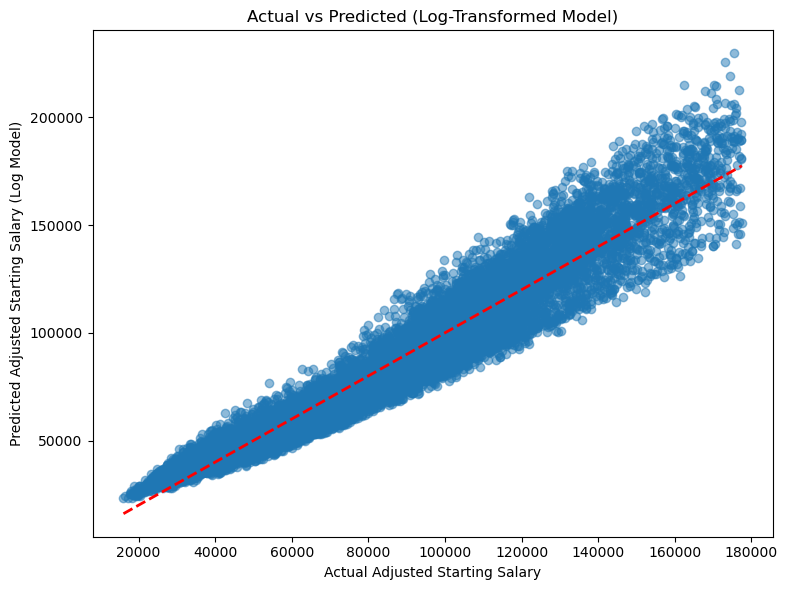

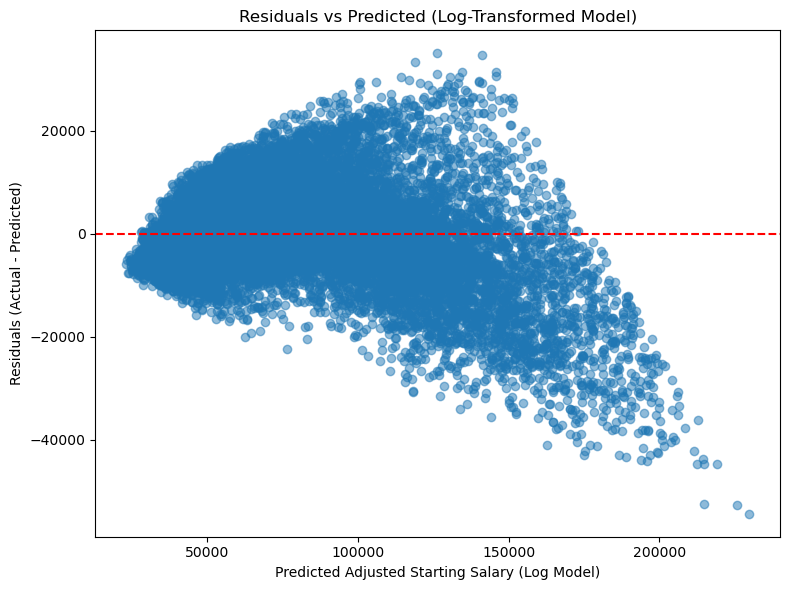


Log-Model Metrics per Major:
                    major           MSE          RMSE        R2
0  Mathematics/Statistics  7.350142e+07   8573.297069  0.927404
1       Physical Sciences  4.490744e+07   6701.301004  0.929293
2                 Biology  5.181979e+07   7198.596637  0.886213
3             Engineering  7.436397e+07   8623.454810  0.928072
4        Computer Science  1.537554e+08  12399.815088  0.854944


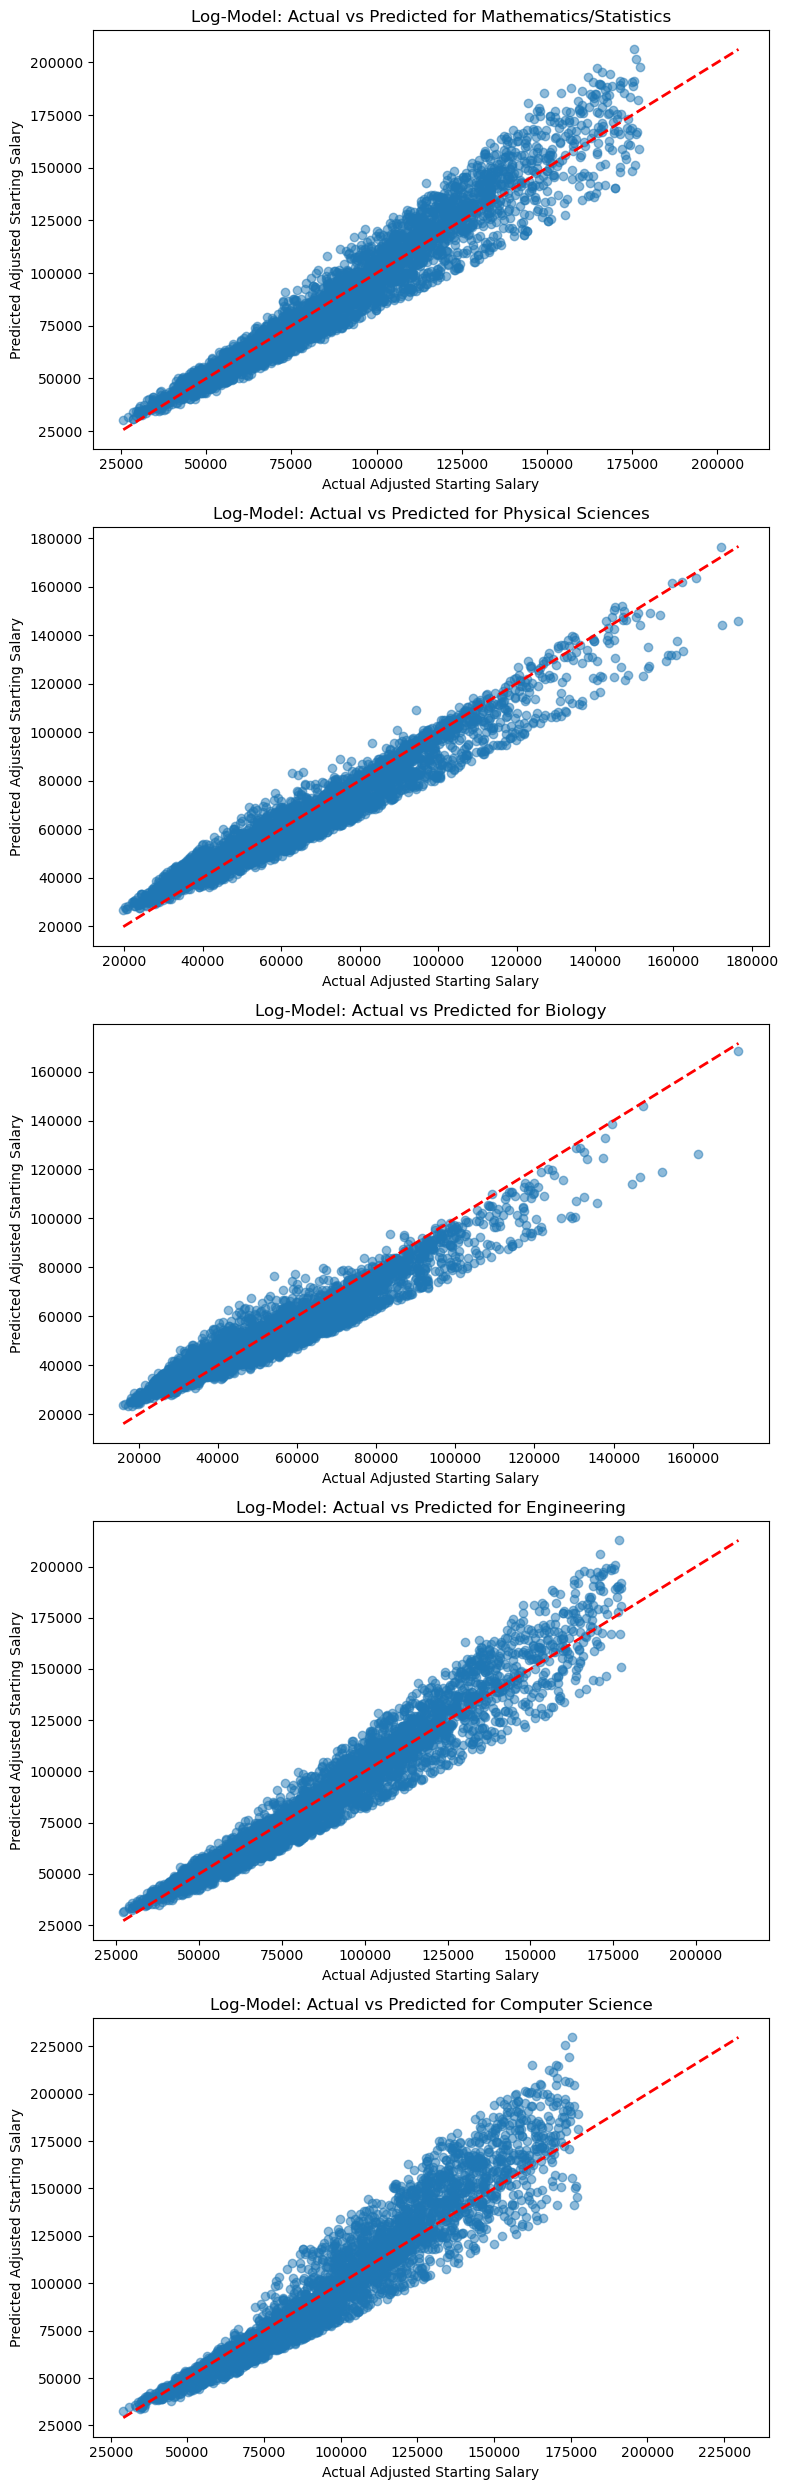

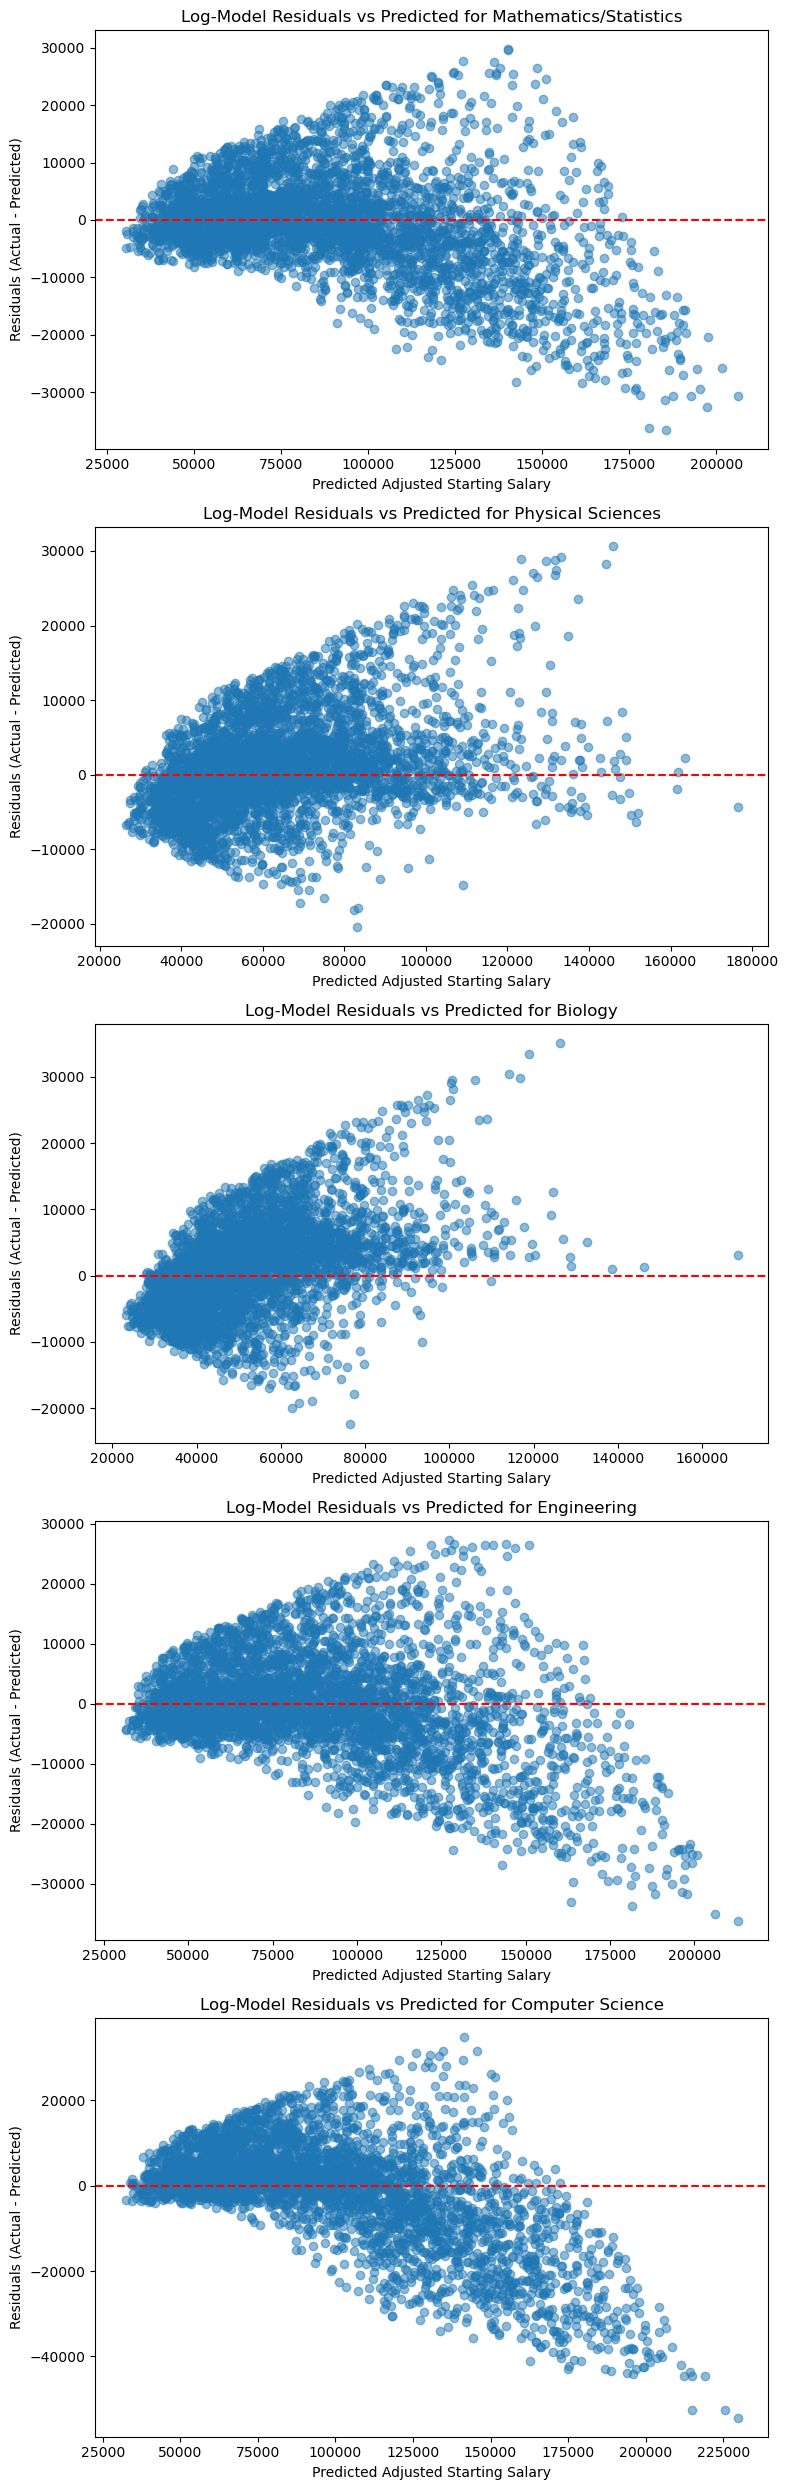

In [12]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# STEP 1: read data from database
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df = pd.read_sql('SELECT * FROM Data', con=engine)



# STEP 2: preprocess data (cap outliers and one-hot encode categorical variables)

# Cap outliers using IQR
Q1 = df['adjusted_starting_salary'].quantile(0.25)
Q3 = df['adjusted_starting_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['adjusted_starting_salary'] >= lower_bound) & (df['adjusted_starting_salary'] <= upper_bound)]

# Target variable
y = df['adjusted_starting_salary']

# Features (all columns except adjusted_starting_salary)
X = df.drop('adjusted_starting_salary', axis=1)

# Convert internship_experience (True/False) to integer (1/0)
X['internship_experience'] = X['internship_experience'].astype(int)

# Keep track of majors (before one-hot encoding) for later evaluation
majors = X['major'].copy()

# Convert categorical variables into dummy/one-hot encoded variables
# X = pd.get_dummies(X, columns=['major', 'degree_type', 'school_type', 'location'], drop_first=True)
X = pd.get_dummies(X, columns=['major', 'degree_type', 'school_type', 'location'], drop_first=False)
X = X.drop(columns=['major_Biology'])  # setting "Biology" as the baseline for major weighting
X = X.drop(columns=['degree_type_bachelors'])  # setting "Bachelors" as the baseline for degree type weighting
X = X.drop(columns=['school_type_public'])  # setting "public" as the baseline for school type weighting
X = X.drop(columns=['location_Midwest Urban'])  # setting "Midwest Urban" as the baseline for location weighting

# Take the logarithm of the target variable
y_log = np.log(y)

# Split into train and test sets
X_train, X_test, y_train_log, y_test_log, majors_train, majors_test = train_test_split(
    X, y_log, majors, test_size=0.2, random_state=42
)
# NOTE: added this in here to artificially increase the "major_Computer Science" coefficient value since - for
# whatever reason - the model was giving me a lower coefficient value for the computer science major multiplier
# compared to all the other majors
X_train['major_Computer Science'] *= 0.15
X_test['major_Computer Science'] *= 0.15



# STEP 3: train and evaluate the model overall

# Initialize and train the linear regression model on the log of the target
log_model = LinearRegression()
log_model.fit(X_train, y_train_log)

# Predict on the test set (in log space)
y_pred_log = log_model.predict(X_test)

# Convert predictions back to the original scale
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test_log)

# Evaluate the model overall
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)
print("Overall Log-Model Mean Squared Error (MSE):", mse)
print("Overall Log-Model Root Mean Squared Error (RMSE):", rmse)
print("Overall Log-Model R2 Score:", r2)

# Create a DataFrame with actual, predicted, and major
results = pd.DataFrame({
    'actual': y_test_original,
    'predicted': y_pred,
    'major': majors_test
})



# STEP 4: visiualize overall results of the model

# Visualize predicted vs actual values on a scatter plot
y_test_original = np.exp(y_test_log)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', linewidth=2)  # line of perfect fit
plt.xlabel('Actual Adjusted Starting Salary')
plt.ylabel('Predicted Adjusted Starting Salary (Log Model)')
plt.title('Actual vs Predicted (Log-Transformed Model)')
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test_original - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Adjusted Starting Salary (Log Model)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted (Log-Transformed Model)')
plt.tight_layout()
plt.show()



# STEP 5: find metrics and create graphs for each major 

# Compute metrics per major
majors_list = results['major'].unique()
metrics = []
for m in majors_list:
    subset = results[results['major'] == m]
    mse_m = mean_squared_error(subset['actual'], subset['predicted'])
    rmse_m = np.sqrt(mse_m)
    r2_m = r2_score(subset['actual'], subset['predicted'])
    metrics.append((m, mse_m, rmse_m, r2_m))

metrics_df = pd.DataFrame(metrics, columns=['major', 'MSE', 'RMSE', 'R2'])
print("\nLog-Model Metrics per Major:")
print(metrics_df)

# Plot Actual vs Predicted for each major on separate subplots
num_majors = len(majors_list)
fig, axes = plt.subplots(nrows=num_majors, ncols=1, figsize=(8, 5 * num_majors))

if num_majors == 1:
    axes = [axes]

for ax, m in zip(axes, majors_list):
    subset = results[results['major'] == m]
    ax.scatter(subset['actual'], subset['predicted'], alpha=0.5)
    # line of perfect prediction
    min_val = min(subset['actual'].min(), subset['predicted'].min())
    max_val = max(subset['actual'].max(), subset['predicted'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    ax.set_title(f"Log-Model: Actual vs Predicted for {m}")
    ax.set_xlabel("Actual Adjusted Starting Salary")
    ax.set_ylabel("Predicted Adjusted Starting Salary")

plt.tight_layout()
plt.show()

# Residual plots per major
fig, axes = plt.subplots(nrows=num_majors, ncols=1, figsize=(8, 5 * num_majors))

if num_majors == 1:
    axes = [axes]

for ax, m in zip(axes, majors_list):
    subset = results[results['major'] == m]
    residuals = subset['actual'] - subset['predicted']
    ax.scatter(subset['predicted'], residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f"Log-Model Residuals vs Predicted for {m}")
    ax.set_xlabel("Predicted Adjusted Starting Salary")
    ax.set_ylabel("Residuals (Actual - Predicted)")

plt.tight_layout()
plt.show()


### Checking weights in the logarithmic regression model...

In [13]:
# Comparing location coefficients
location_features = [col for col in X_train.columns if 'location_' in col]
location_coefficients = model.coef_[[X_train.columns.get_loc(f) for f in location_features]]
location_coef_df = pd.DataFrame({
    'Location Feature': location_features,
    'Coefficient': location_coefficients
}).sort_values(by='Coefficient', ascending=False)

print("LOCATION COEFFICIENTS...")
print(location_coef_df)
print()


# Comparing major coefficients
major_features = [col for col in X_train.columns if 'major_' in col]
major_coefficients = model.coef_[[X_train.columns.get_loc(f) for f in major_features]]

print("MAJOR COEFFICIENTS...")
print(pd.DataFrame({'Major Feature': major_features, 'Coefficient': major_coefficients}))
print()


# Finding the most impactful features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("FEATURES RANKED BY IMPACT...")
print(feature_importance.head(100))
print()


# Looking at categories in the training data frame (should exclude the categories that we want to use as baselines)
print("TRAINING COLUMNS...")
print(X_train.columns)
print()

LOCATION COEFFICIENTS...
                Location Feature   Coefficient
0   location_California Bay Area  21322.914885
2      location_NYC Greater Area   7995.643851
7       location_Northwest Urban   7843.939168
12      location_Southwest Urban   3681.081965
5       location_Northeast Urban   3625.759985
3        location_Non-Contiguous   3523.094649
10      location_Southeast Urban   3491.546958
6       location_Northwest Rural  -3914.150354
1         location_Midwest Rural  -4179.906805
11      location_Southwest Rural  -7191.908653
9       location_Southeast Rural  -7205.300804
4       location_Northeast Rural  -7383.128773
8                location_Plains  -7417.820246

MAJOR COEFFICIENTS...
                  Major Feature  Coefficient
0        major_Computer Science  1211.197151
1             major_Engineering   877.438668
2  major_Mathematics/Statistics   810.227581
3       major_Physical Sciences   470.279892

FEATURES RANKED BY IMPACT...
                         Feature   Coef

### Testcases for logarithmic regression model...

In [30]:
# NOTE: by default, this cell uses the same test cases as defined previously (while testing the linear regression
# model), but feel free to uncomment the test_cases list below if you want to use different test cases

test_cases = [
    {
        'major': 'Computer Science',
        'initial_starting_salary': 91411,
        'degree_type': 'bachelors',
        'school_type': 'public',
        'location': 'NYC Greater Area',
        'internship_experience': 1,
        'school_ranking': 100
    },
    {
        'major': 'Computer Science',
        'initial_starting_salary': 91411,
        'degree_type': 'masters',
        'school_type': 'public',
        'location': 'NYC Greater Area',
        'internship_experience': 1,
        'school_ranking': 100
    },
    {
        'major': 'Computer Science',
        'initial_starting_salary': 91411,
        'degree_type': 'doctorate',
        'school_type': 'public',
        'location': 'NYC Greater Area',
        'internship_experience': 1,
        'school_ranking': 100
    },
]

# Convert test cases into a dataframe
test_df = pd.DataFrame(test_cases)

# Convert internship_experience (True/False) to integer (1/0)
test_df['internship_experience'] = test_df['internship_experience'].astype(int)

# One-hot encode categorical variables (same approach as during training)
test_df = pd.get_dummies(test_df, columns=['major', 'degree_type', 'school_type', 'location'], drop_first=False)

# Align test_df columns with X_train columns
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with default value of 0
test_df = test_df[X_train.columns]  # Ensure column order matches

# Predict salaries for the test cases (in log space)
y_pred_log = log_model.predict(test_df)

# Convert log predictions back to the original scale
y_pred_original = np.exp(y_pred_log)

# Display the predictions
for i, prediction in enumerate(y_pred_original):
    print(f"Test Case {i + 1}: Predicted Adjusted Starting Salary = ${prediction:.2f}")

Test Case 1: Predicted Adjusted Starting Salary = $149589.70
Test Case 2: Predicted Adjusted Starting Salary = $191195.75
Test Case 3: Predicted Adjusted Starting Salary = $234351.60


# STEP 4: Additional Data Analysis (box and whisker plots & outlier counts)

##  By Major

Outlier Counts by Major:
Biology: 344 / 20000   (1.72%)
Computer Science: 397 / 20000   (1.98%)
Engineering: 389 / 20000   (1.94%)
Mathematics/Statistics: 399 / 20000   (1.99%)
Physical Sciences: 380 / 20000   (1.90%)


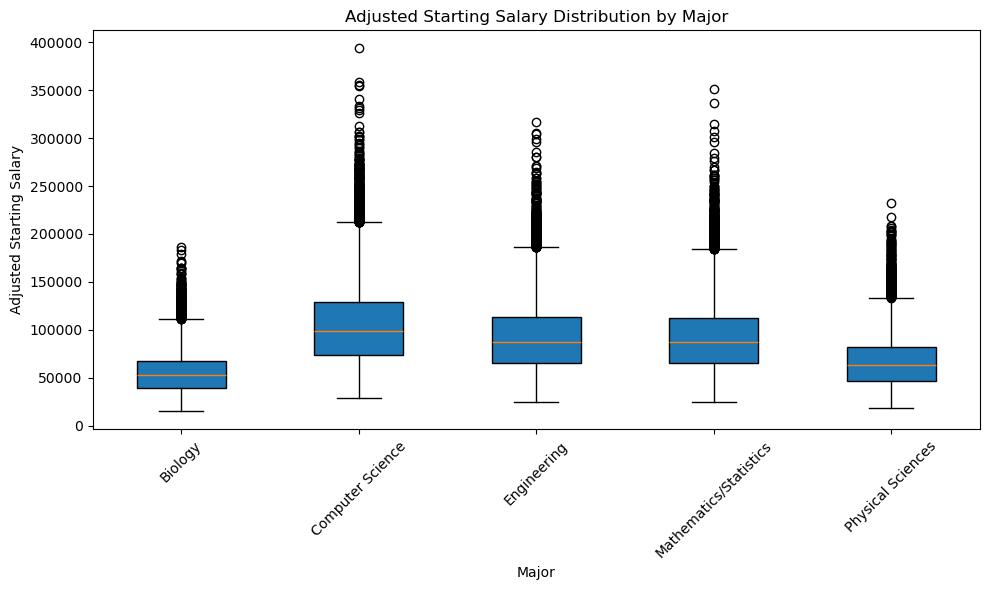

In [15]:
# Create df by querying from database
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df = pd.read_sql("SELECT major, adjusted_starting_salary FROM Data", con=engine)

# Group by major and get the list of adjusted_starting_salaries for each major
grouped = df.groupby('major')['adjusted_starting_salary'].apply(list)

# Initialize a dictionary to store outlier counts
outlier_counts = {}

# Group by major and calculate outliers
for major, group in df.groupby('major'):
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(group['adjusted_starting_salary'], 25)
    Q3 = np.percentile(group['adjusted_starting_salary'], 75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = group[(group['adjusted_starting_salary'] < lower_bound) | 
                     (group['adjusted_starting_salary'] > upper_bound)]
    
    outlier_counts[major] = len(outliers)

# Print outlier data
print("Outlier Counts by Major:")
for major, count in outlier_counts.items():
    print(f"{major}: {count} / {entries_per_major}   ({count / entries_per_major * 100:.2f}%)")

# Prepare data for boxplot
grouped = df.groupby('major')['adjusted_starting_salary'].apply(list)
data_for_plot = [grouped[major] for major in grouped.index]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_plot, labels=grouped.index, vert=True, patch_artist=True)
plt.title('Adjusted Starting Salary Distribution by Major')
plt.xlabel('Major')
plt.ylabel('Adjusted Starting Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## By Degree Type

Outlier Counts by Degree Type:
bachelors: 856 / 69861   (1.23%)
doctorate: 112 / 10129   (1.11%)
masters: 294 / 20010   (1.47%)


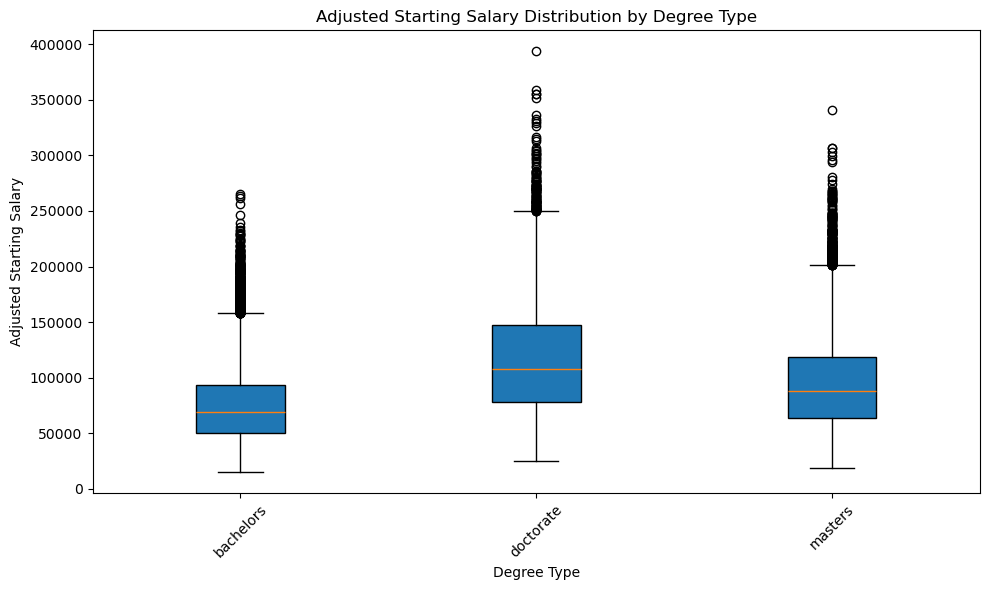

In [16]:
# Create df by querying from database
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df = pd.read_sql("SELECT degree_type, adjusted_starting_salary FROM Data", con=engine)

# Initialize a dictionary to store outlier proportions
outlier_proportions = {}

# Group by degree_type and calculate outliers
for degree_type, group in df.groupby('degree_type'):
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(group['adjusted_starting_salary'], 25)
    Q3 = np.percentile(group['adjusted_starting_salary'], 75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = group[(group['adjusted_starting_salary'] < lower_bound) | 
                     (group['adjusted_starting_salary'] > upper_bound)]
    num_outliers = len(outliers)
    total_entries = len(group)
    
    # Store outlier data
    outlier_proportions[degree_type] = [num_outliers, total_entries]

# Print outlier data
print("Outlier Counts by Degree Type:")
for degree_type, proportion in outlier_proportions.items():
    cur_outlier_count, cur_entries_per_degree_type = outlier_proportions[degree_type][0], outlier_proportions[degree_type][1]
    print(f"{degree_type}: {cur_outlier_count} / {cur_entries_per_degree_type}   ({cur_outlier_count / cur_entries_per_degree_type * 100:.2f}%)")

# Prepare data for boxplot
grouped = df.groupby('degree_type')['adjusted_starting_salary'].apply(list)
data_for_plot = [grouped[degree_type] for degree_type in grouped.index]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_plot, labels=grouped.index, vert=True, patch_artist=True)
plt.title('Adjusted Starting Salary Distribution by Degree Type')
plt.xlabel('Degree Type')
plt.ylabel('Adjusted Starting Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## By Location

Outlier Counts by Location (ordered by median salary):
California Bay Area: 142 / 7155   (1.98%)
NYC Greater Area: 140 / 7127   (1.96%)
Northwest Urban: 154 / 6970   (2.21%)
Southeast Urban: 134 / 7201   (1.86%)
Northeast Urban: 165 / 7291   (2.26%)
Southwest Urban: 136 / 7137   (1.91%)
Non-Contiguous: 131 / 7018   (1.87%)
Midwest Urban: 163 / 7184   (2.27%)
Midwest Rural: 141 / 7166   (1.97%)
Northwest Rural: 135 / 7149   (1.89%)
Southeast Rural: 140 / 7197   (1.95%)
Plains: 134 / 7137   (1.88%)
Southwest Rural: 142 / 7087   (2.00%)
Northeast Rural: 135 / 7181   (1.88%)


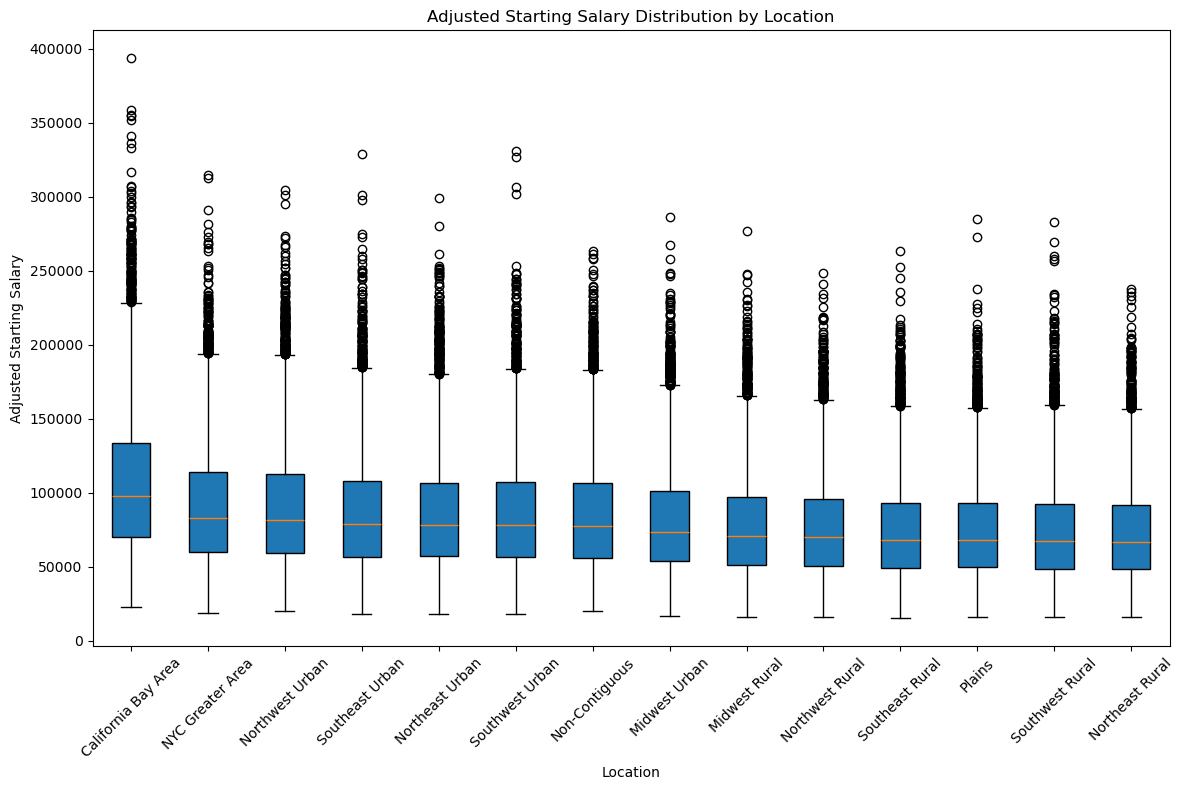

In [17]:
# Create df by querying from database
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df = pd.read_sql("SELECT location, adjusted_starting_salary FROM Data", con=engine)

# Initialize a dictionary to store outlier counts and total entries
outlier_proportions = {}

# Group by location and calculate outliers
for location, group in df.groupby('location'):
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(group['adjusted_starting_salary'], 25)
    Q3 = np.percentile(group['adjusted_starting_salary'], 75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = group[(group['adjusted_starting_salary'] < lower_bound) | 
                     (group['adjusted_starting_salary'] > upper_bound)]
    num_outliers = len(outliers)
    total_entries = len(group)
    
    # Store outlier data
    outlier_proportions[location] = [num_outliers, total_entries]

# Sort locations by median salary in descending order
medians = df.groupby('location')['adjusted_starting_salary'].median()
sorted_locations = medians.sort_values(ascending=False).index

# Print outlier data in sorted order
print("Outlier Counts by Location (ordered by median salary):")
for location in sorted_locations:
    num_outliers, total_entries = outlier_proportions[location]
    print(f"{location}: {num_outliers} / {total_entries}   ({num_outliers / total_entries * 100:.2f}%)")

# Prepare data for boxplot (ordered by sorted_locations)
grouped = df.groupby('location')['adjusted_starting_salary'].apply(list)
data_for_plot = [grouped[location] for location in sorted_locations]

# Create a boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(data_for_plot, labels=sorted_locations, vert=True, patch_artist=True)
plt.title('Adjusted Starting Salary Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Adjusted Starting Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## By Location (for computer science majors specifically)

Outlier Counts for CS Majors by Location (ordered by median salary):
California Bay Area: 19 / 1441   (1.32%)
NYC Greater Area: 13 / 1462   (0.89%)
Northwest Urban: 19 / 1392   (1.36%)
Southeast Urban: 28 / 1440   (1.94%)
Southwest Urban: 29 / 1444   (2.01%)
Northeast Urban: 33 / 1464   (2.25%)
Non-Contiguous: 24 / 1382   (1.74%)
Midwest Urban: 13 / 1380   (0.94%)
Northwest Rural: 21 / 1384   (1.52%)
Midwest Rural: 22 / 1419   (1.55%)
Plains: 17 / 1423   (1.19%)
Southeast Rural: 33 / 1492   (2.21%)
Northeast Rural: 18 / 1426   (1.26%)
Southwest Rural: 27 / 1451   (1.86%)


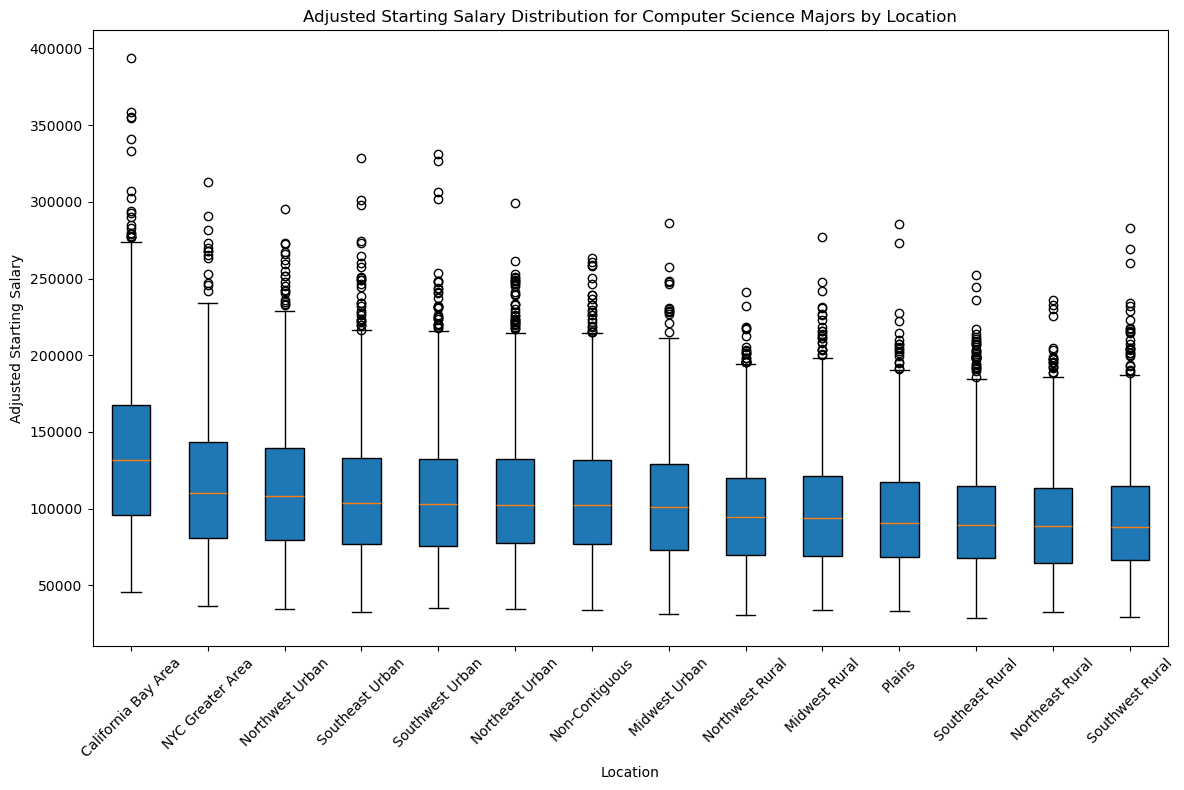

In [18]:
# Create df by querying from database
engine = create_engine('sqlite:///mydatabase.db', echo=False)
df = pd.read_sql("SELECT major, location, adjusted_starting_salary FROM Data", con=engine)

# Filter for CS majors only
df_cs = df[df['major'] == 'Computer Science']

# Initialize a dictionary to store outlier counts and total entries
outlier_proportions = {}

# Group by location and calculate outliers
for location, group in df_cs.groupby('location'):
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(group['adjusted_starting_salary'], 25)
    Q3 = np.percentile(group['adjusted_starting_salary'], 75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = group[(group['adjusted_starting_salary'] < lower_bound) | 
                     (group['adjusted_starting_salary'] > upper_bound)]
    num_outliers = len(outliers)
    total_entries = len(group)
    
    # Store outlier data
    outlier_proportions[location] = [num_outliers, total_entries]

# Sort locations by median salary in descending order
medians = df_cs.groupby('location')['adjusted_starting_salary'].median()
sorted_locations = medians.sort_values(ascending=False).index

# Print outlier data in sorted order
print("Outlier Counts for CS Majors by Location (ordered by median salary):")
for location in sorted_locations:
    num_outliers, total_entries = outlier_proportions[location]
    print(f"{location}: {num_outliers} / {total_entries}   ({num_outliers / total_entries * 100:.2f}%)")

# Prepare data for boxplot (ordered by sorted_locations)
grouped = df_cs.groupby('location')['adjusted_starting_salary'].apply(list)
data_for_plot = [grouped[location] for location in sorted_locations]

# Create a boxplot
plt.figure(figsize=(12, 8))
plt.boxplot(data_for_plot, labels=sorted_locations, vert=True, patch_artist=True)
plt.title('Adjusted Starting Salary Distribution for Computer Science Majors by Location')
plt.xlabel('Location')
plt.ylabel('Adjusted Starting Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
